In [63]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import IPython

from tqdm import trange

import matplotlib.pyplot as plt
%matplotlib inline

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Find sample sounds [here](https://librosa.org/doc/main/recordings.html):

|`key`|full name|description|
|-|-|-|
| brahms | Brahms - Hungarian Dance #5 |  A short performance of this piece, with soft note onsets and variable tempo.|
| choice | Admiral Bob - Choice | A short drum and bass loop, good for demonstrating decomposition methods.| 
| fishin | Karissa Hobbs - Let’s Go Fishin’ |  A folk/pop song with verse/chorus/verse structure and vocals.|
| nutcracker | Tchaikovsky - Dance of the Sugar Plum Fairy | Orchestral piece included to demonstrate tempo and harmony features.|
| trumpet | Mihai Sorohan - Trumpet loop | Monophonic trumpet recording, good for demonstrating pitch features. |
| vibeace | Kevin Macleod - Vibe Ace | A vibraphone, piano, and bass combo. Previously the only included example.|

In [19]:
def get_example(key):
  filename = librosa.ex(key)
  data, samplerate = sf.read(filename, dtype='float32')
  data = data.T
  data_22k = librosa.resample(data, samplerate, 22050)
  return data_22k, 22050  

In [24]:
data, sr = get_example("choice")
IPython.display.Audio(data = data, rate = sr)

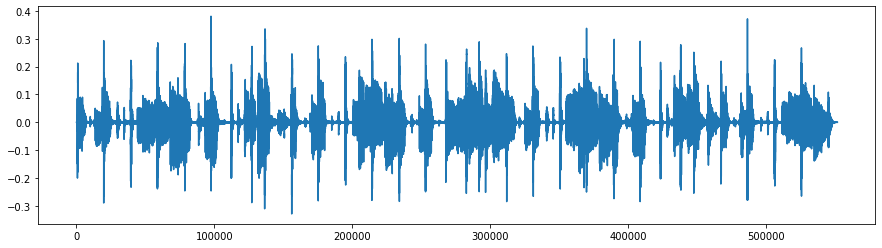

In [42]:
plt.figure(figsize = (15, 4))
plt.plot(data)

In [51]:
# Compute local onset autocorrelation
y, sr = librosa.load(librosa.ex('nutcracker'), duration=30)
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

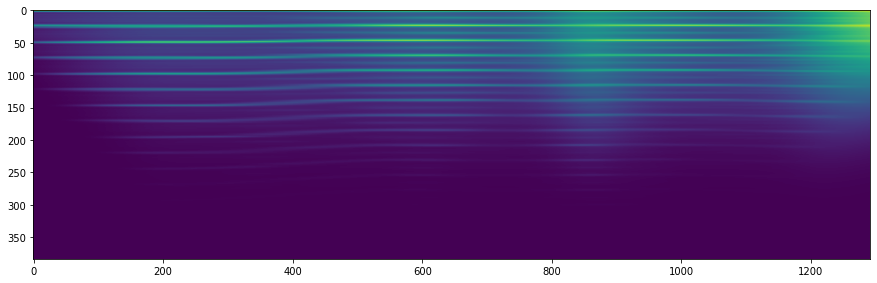

In [54]:
plt.figure(figsize = (15, 5))
plt.imshow(tempogram)

In [56]:
import sys
from daily import *
sys.path.append(folder("."))
from stylegan2.model import StyleGAN2Model, image_grid

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(


In [57]:
model = StyleGAN2Model()
model.num_params

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading model from ... /Users/yashbonde/Desktop/designs/sanskrit/StyleGAN2-Art/.models/model_45.pt


49146273

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 18 s, sys: 11.4 s, total: 29.4 s
Wall time: 18 s


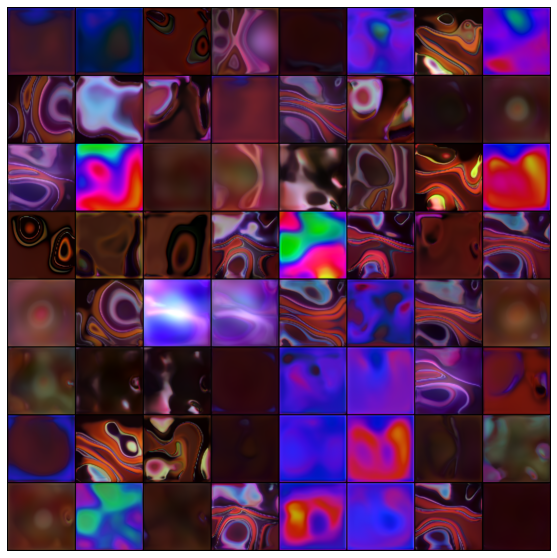

In [58]:
%%time
fps = 24 # for each second
num_seconds = 1 # len(data) // sr
buffer = []

pbar = trange(num_seconds * fps)
for _ in pbar:
  b = 64
  noise = np.zeros((b, model.image_size, model.image_size, 1))
  z = np.zeros((b, model.latent_dim))
  
  
  
  samples = model.get_image_from_latents(z, noise)
  buffer.append(samples)


In [65]:
image_grid(samples, 8).shape

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


torch.Size([1042, 1042, 3])

/Users/yashbonde/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


130.25

<ipython-input-50-731601f4948c>:21: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
<ipython-input-50-731601f4948c>:23: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,


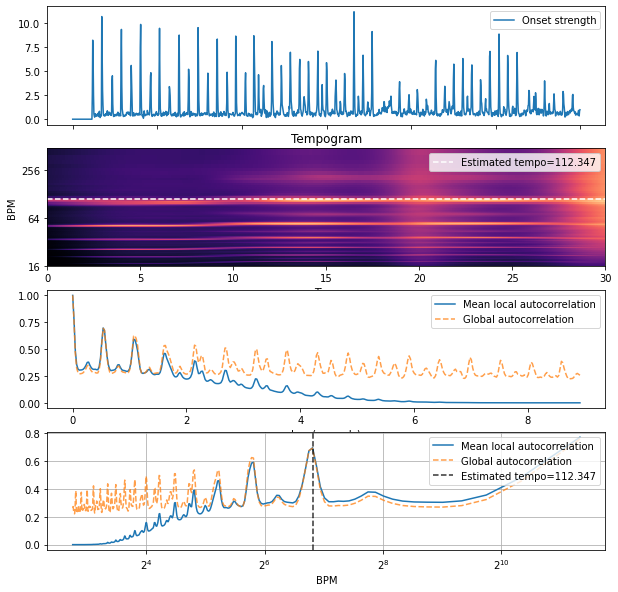

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

In [46]:
tempogram.shape

(384, 1292)

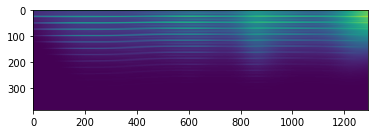

In [47]:
plt.imshow(tempogram)

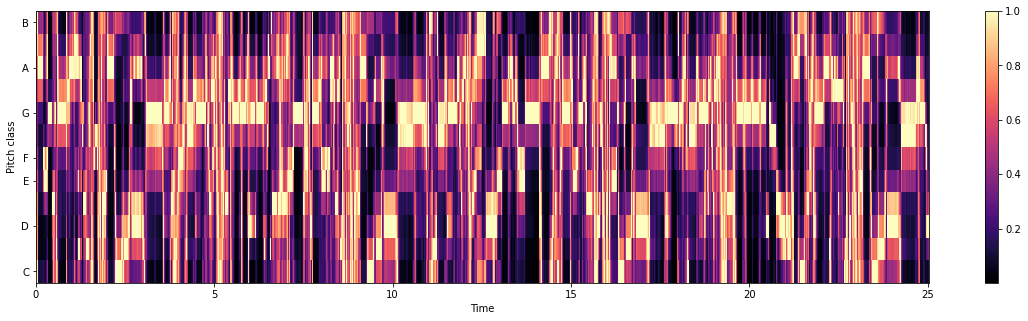

In [32]:
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
fig, ax = plt.subplots(figsize = (20, 5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)

In [41]:
len(data) // sr

25